## Comandos inicias

In [27]:
!pip -q install tika
!pip -q install pyarrow

In [28]:
##########################################
# libs python
##########################################
import re
import warnings

##########################################
# libs externas
##########################################
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import common_texts
from IPython.display import display, HTML, Latex, Markdown
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

##########################################
# configurações
##########################################
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
pd.options.display.max_rows = 2000
pd.options.display.max_colwidth = 200

# faz com que o nltk baixe arquivos e modelos necessários para este notebook
nltk.download('punkt')
nltk.download('stopwords')

##########################################
# variáveis globais
##########################################
DEFAULT_RANDOM_STATE = 42
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# mostrar o diretório atual (current folder)
%pwd

'/content'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# mudar o diretório ou pasta (folder)
%cd /content/drive/MyDrive/Colab Notebooks/bootcamp/

/content/drive/MyDrive/Colab Notebooks/bootcamp


In [6]:
%cd dados

/content/drive/MyDrive/Colab Notebooks/bootcamp/dados


In [7]:
%ls

'Blueprints for Text Analytics Using Python.pdf'
 correlacao.pdf
'Documento com imagem.docx'
'Estatistica Aplicada e Probabilidade para Engenheiros.pdf'
'Getting Started with Google BERT - Build and train state-of-the-art natural language processing models using BERT.pdf'
 livros.parquet
'The Elements of Data Analytic Style.pdf'
 word2vec.model


In [8]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/bootcamp/dados'

# **NLP - BoW ao BERT**

Uma visão geral da evolução em NLP.


Autores:
* Fernando Sola Pereira
* Eduardo Soares de Paiva






## **Bag of Words**

### Características

* Utilizam a ocorrência das palavras como features
* Permitem uso de bigramas ou combinações maiores
* Precisam de um dicionário para guiar a montagem dos vetores

### Algoritmos

* TF - Frequência de Termos (+ variação binarizada)

  * Anos ~1950


* TF-IDF - Frequência de Termos pelo Inverso da Frequência nos Documentos

  * JONES, Karen Sparck. A statistical interpretation of term specificity and its application in retrieval. Journal of documentation, 1972. https://www.emerald.com/insight/content/doi/10.1108/eb026526/full/html

### Tarefas comuns

* representação do texto como features para Classificação / Regressão / Clusterização
* busca por similaridade / comparação de documentos

### Mas a vida é uma caixinha de surpresas (Limitações ou Problemas)

* vetores possuem o tamanho do dicionário usado, geralmente são grandes
* preprocessamento e limpeza faz muita diferença nos resultados
* **palavras com multiplos significados não são diferenciadas**
* **não captura sintaxe e semântica das sentenças**








In [9]:
# Carga e tratamento inicial do dataframe.

df_lame = pd.read_csv('https://docs.google.com/uc?export=download&id=1_EKfnjomkWks4VqTMIpcEIb6nB5P0Xz2')
df_lame.columns = ['label','text']
df_lame['label'] = df_lame['label'].apply(lambda x: 1 if x == 'positivo' else 0)

def tratar_texto(t):
  """Função de padronização.

  Textos nulos são transformados em '' e caracteres são colocados em 
  caixa baixa.

  Args: 
    t (str): texto que deve ser padronizado

  Returns:
    Texto tratado.
  """
  if not t:
    t = ''
  elif not isinstance(t, str):
    t = str(t)
  
  t = t.lower()
  t = re.sub(r'\b[0-9]+\b','',t)

  return t

# realiza tratamento do texto
df_lame['text'] = df_lame['text'].apply(tratar_texto)

# divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_lame.drop(columns='label'), df_lame['label'], stratify=df_lame['label'], test_size=.2, random_state=DEFAULT_RANDOM_STATE)

# exibe o dataframe
display(Markdown('### Dados brutos apenas com textos padronizados em caixa baixa <br/><br/>'))
display(X_train.head())

tfidf = TfidfVectorizer(min_df=3, max_df=.7, max_features=2000, stop_words=stopwords, ngram_range=(1,1))
tfidf.fit(X_train['text'])
X_train_idf = tfidf.transform(X_train['text'])
X_test_idf = tfidf.transform(X_test['text'])

X_train_idf_txt = pd.DataFrame(X_train_idf.todense(), columns=tfidf.get_feature_names_out())
X_train_idf_txt.index = X_train.index

X_test_idf_txt = pd.DataFrame(X_test_idf.todense(), columns=tfidf.get_feature_names_out())
X_test_idf_txt.index = X_test.index

display(Markdown('<br/><br/>'))
display(Markdown('### Dados transformados em TF-IDF <br/><br/>'))
display(HTML(X_train_idf_txt.head().to_html()))

### Dados brutos apenas com textos padronizados em caixa baixa <br/><br/>

,text
42913,excelente. compro semprep este site. entrega rápida. parabéns....
54296,"o produto não é bom nem ruim, apenas não é um item que se torne indispensável no meu dia a dia."
81183,muito bom.. ficou um pouco pequeno pro meu notebook samsung . mas foi erro meu não ter ligo direito as especificações. mesmo assim é um material que estica um pouco e coube perfeitamente. muito bo...
83273,atendeu minhas expectativas... super recomendo ! imagem e som excelentes !
31241,"ele ficou lindo na minha sala, super funcional, adorei."


<br/><br/>

### Dados transformados em TF-IDF <br/><br/>

In [20]:
X_train_idf_txt.shape

(66970, 2000)

### Exemplo de classificação <br/><br/>

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7152
           1       0.93      0.94      0.93      9591

    accuracy                           0.92     16743
   macro avg       0.92      0.92      0.92     16743
weighted avg       0.92      0.92      0.92     16743



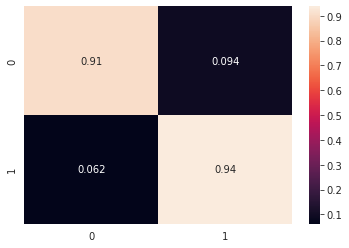

__Frase__: Não vi outro produto que atende tão bem a minha necessidade. / Negativo (0.46), Positivo (0.54)

__Frase__: Parabéns, você é excelente em fazer besteira. / Negativo (0.0), Positivo (1.0)

In [23]:
display(Markdown('### Exemplo de classificação <br/><br/>'))

clf = RandomForestClassifier(n_estimators=50, random_state=DEFAULT_RANDOM_STATE, class_weight='balanced')
clf.fit(X_train_idf_txt, y_train)
y_pred = clf.predict(X_test_idf_txt)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(normalize='true', y_pred=y_pred, y_true=y_test)
sns.heatmap(cm, annot=True)
plt.show()

frase = 'Não vi outro produto que atende tão bem a minha necessidade.'
y_pred = clf.predict_proba(tfidf.transform( [frase] ))
y_pred

display(Markdown(f'__Frase__: {frase} / Negativo ({y_pred[0, 0]}), Positivo ({y_pred[0, 1]})'))

frase = 'Parabéns, você é excelente em fazer besteira.'
y_pred = clf.predict_proba(tfidf.transform( [frase] ))
y_pred

display(Markdown(f'__Frase__: {frase} / Negativo ({y_pred[0, 0]}), Positivo ({y_pred[0, 1]})'))

In [11]:
display(Markdown('### Exemplo de similaridade / Information retrieval'))

texto = X_train.loc[54296, 'text']
texto = 'loja com atendimento excelente e o produto nem se fala parabéns'
sim = cosine_similarity(X_test_idf_txt, tfidf.transform( [texto] ))

df_resultado = X_test.copy()
df_resultado['Similaridade'] = sim

display(Markdown('<br/>'))
display(Markdown('__Frase__: {}'.format(texto)))
display(Markdown('__Mais similar__: {}'.format(df_resultado.sort_values('Similaridade', ascending=False).iloc[1, 0])))

display(df_resultado.sort_values('Similaridade', ascending=False).head())

### Exemplo de similaridade / Information retrieval

<br/>

__Frase__: loja com atendimento excelente e o produto nem se fala parabéns

__Mais similar__: ótimo o produto,o atendimento excelente,muito atenciosos estão de parabéns.

,text,Similaridade
77908,loja com atendimento excelente e o produto nem se fala. parabéns,1.000000
15810,"ótimo o produto,o atendimento excelente,muito atenciosos estão de parabéns.",0.635753
15640,produto de excelente qualidade!! recomendo. parabéns a loja!,0.579573
38193,"ótimo atendimento da loja o pescador! atendimento ágil e atencioso, parabéns! recomendo!",0.545654
15643,excelente produto. recomendo a todos. parabéns a loja!,0.544555


## __Word Embeddings Não Contextualizadas__

Palavras vizinhas estão relacionadas semanticamente, logo, palavras semelhantes ocorrem em contextos semelhantes. 

* Harris, Z. S. Distributional Structure. WORD 10 (2-3): 146–162, aug, 1954

É possível conhecer uma palavra através das palavras que a acompanham (“You shall know a word by the company it keeps!”).

* Firth, J. R. A synopsis of linguistic theory, 1930-1955. Studies in linguistic analysis, 1957.


### Características

* representação de palavras em vetores densos com baixa dimensionalidade
* apredizado autosupervisionado, ou seja, os valores são aprendidos a partir do próprio texto
* capturam a semântica da palavra

### Algoritmos

* word2vec

  * Mikolov, T., Chen, K., Corrado, G., and Dean, J. Efficient estimation of word representations in vector space, 2013. https://arxiv.org/abs/1301.3781

  * Mikolov, T., Sutskever, I., Chen, K., Corrado, G., and Dean, J. Distributed representations of words and phrases and their compositionality. In Proceedings of the 26th International Conference on Neural Information Processing Systems - Volume 2. NIPS’13. Curran Associates Inc., Red Hook, NY, USA, pp. 3111–3119, 2013. https://arxiv.org/abs/1310.4546

* GloVe - Global Vectors for Word Representation
  * Pennington, J., Socher, R., and Manning, C. D. Glove: Global vectors for word representation. In EMNLP. Vol. 14. pp. 1532–1543, 2014. https://nlp.stanford.edu/pubs/glove.pdf

* FastText
  * Bojanowski, P., Grave, E., Joulin, A., and Mikolov, T. Enriching word vectors with subword information. Trans. Assoc. Comput. Linguistics vol. 5, pp. 135–146, 2017.

* Wang2Vec
  * Ling, W., Dyer, C., Black, A. W., and Trancoso, I. Two/too simple adaptations of Word2Vec for syntax problems. In Proceedings of the 2015 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies. Association for Computational Linguistics, Denver, Colorado, pp.
1299–1304, 2015.

### Tarefas Comuns

* representação do texto como features para Classificação / Regressão / Clusterização
* busca por similaridade / comparação de documentos
* reconhecimento de entidades nomeadas (NER)
* sumarização de textos (extrativa)

### Mas a vida é uma caixinha de surpresas (Limitações ou Problemas)

* **palavras com multiplos significados não são diferenciadas**
* custo computacional médio




In [12]:
def remover_caracteres_especiais(t):
  return re.sub(r'[!,.?()\[\]\n]', r' ', t)

corpus = [remover_caracteres_especiais(s).split() for s in df_lame['text']]

model = Word2Vec(sentences=corpus, size=100, window=5, min_count=1, workers=1)
model.save("word2vec.model")

In [13]:
model.wv.most_similar(['otimo'], topn=10)

[('ótimo', 0.818669319152832),
 ('exelente', 0.7923138737678528),
 ('maravilhoso', 0.7897376418113708),
 ('excelente', 0.7688996195793152),
 ('perfeito', 0.7446731925010681),
 ('fantástico', 0.7214792370796204),
 ('bom', 0.6984145045280457),
 ('superrrrr', 0.691234290599823),
 ('sensacional', 0.6852699518203735),
 ('impecável', 0.6711077690124512)]

In [14]:
model.wv.most_similar(['péssimo'], topn=10)

[('pessimo', 0.837922215461731),
 ('horrível', 0.7913902997970581),
 ('ruim', 0.6418095827102661),
 ('orrivel', 0.5866876840591431),
 ('ineficaz', 0.5761690139770508),
 ('americanas/olist', 0.5740207433700562),
 ('detestável', 0.5734459161758423),
 ('horrivel', 0.5732324123382568),
 ('eletrônico', 0.5679188370704651),
 ('péssima', 0.5557007193565369)]

In [15]:
model.wv.similarity('ótimo', 'bom'), model.wv.similarity('ótimo', 'razoável'), model.wv.distance('ótimo', 'ruim'), model.wv.similarity('ótimo', 'horrível')

(0.773985, 0.68301195, 0.8129345923662186, 0.17678978)

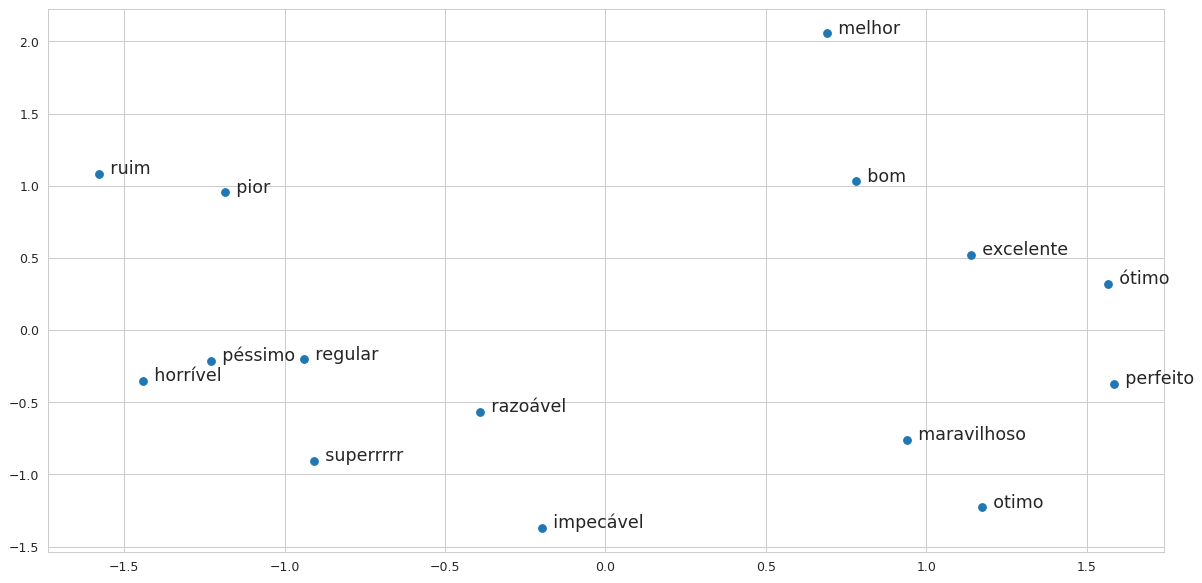

In [26]:
palavras = ['bom', 'regular', 'ruim', 'ótimo', 'otimo', 'razoável', 'pior', 'melhor', 'péssimo', 'excelente', 'maravilhoso', 'perfeito', 'superrrrr', 'impecável', 'horrível']
palavrasa = np.array([model.wv.word_vec(p) for p in palavras])

mms = MinMaxScaler()
v_palavras = mms.fit_transform(palavrasa)

pca = PCA(n_components=2)
v_palavras = pca.fit_transform(v_palavras)

fig, ax = plt.subplots(figsize=(16,8), dpi=90)

# pontos
plt.plot(v_palavras[:, 0], v_palavras[:, 1], marker='o', linestyle='')

# textos
for x, y, s in zip(v_palavras[:, 0], v_palavras[:, 1], palavras):
  plt.text(x, y, '  {}'.format(s), fontsize=14)


plt.show()

In [17]:
documents = [TaggedDocument(remover_caracteres_especiais(s).split(), [i]) for i, doc in enumerate(df_lame['text']) for s in sent_tokenize(doc)]
model = Doc2Vec(documents, vector_size=50, window=5, min_count=1, workers=1, epochs=10, seed=DEFAULT_RANDOM_STATE)

In [18]:
vx = [model.infer_vector(d, steps=5) for d in df_lame['text'].apply(lambda x: remover_caracteres_especiais(x).split())]

In [19]:
frase = 'loja com atendimento excelente e o produto nem se fala parabéns'
vfrase = model.infer_vector(frase.split(), steps=100)

sim = cosine_similarity(vx, [vfrase])

df_resultado = df_lame.copy()
df_resultado['Similaridade'] = sim
df_resultado.sort_values('Similaridade', ascending=False).head()

,label,text,Similaridade
77908,1,loja com atendimento excelente e o produto nem se fala. parabéns,0.935040
78709,1,muito bom o produto parabéns ! muito bom o produto parabéns ! muito bom o produto parabéns !,0.808062
25000,1,o produto e de otima qualidade e a entrega nem se fala parabéns a lojas americanas.,0.789506
1942,1,linha linda da tramontina. a qualidade nem se fala. parabéns a tramontina e a lojas americanas. entraga rápida e excelente produto. recomendo!,0.782936
78313,1,"parabéns !!! entrega antes do prazo, produto como anunciado, super indico.",0.780379


## __Word Embeddings Contextualizadas__

### Características

* todas as características anteriores
* considera a ordem das palavras na sentença
* é necessário ter a rede treinada para gerar os vetores
* **gera representações diferentes para uma mesma palavra de acordo com o contexto**
* utilização de modelos pré-treinados em grandes corpus
* necessidade de poucas épocas/exemplos (depende do modelo) para ajuste fino dos modelos pre-treinados


### Algoritmos

* ELMo (2018)
  * LSTM
  * Baseado em caracteres, não precisa de dicionário
  * Peters, M. E., Neumann, M., Iyyer, M., Gardner, M., Clark, C., Lee, K., & Zettlemoyer, L. (2018). Deep contextualized word representations. https://arxiv.org/abs/1802.05365

* GPT (2018), GPT2 (2019), GPT3 (2020), Codex (2021)
  * Transformers (apenas decoder)
  * Brown, T. B., Mann, B., Ryder, N., Subbiah, M., Kaplan, J., Dhariwal, P., ... & Amodei, D. (2020). Language models are few-shot learners. arXiv preprint arXiv:2005.14165. https://arxiv.org/abs/2005.14165

* BERT (2018), ALBERT (2019) (+ diversas variações e derivações)
  * Transformers (apenas encoder)

  * Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018). Bert: Pre-training of deep bidirectional transformers for language understanding. arXiv preprint arXiv:1810.04805. https://arxiv.org/abs/1810.04805

  * Lan, Z., Chen, M., Goodman, S., Gimpel, K., Sharma, P., & Soricut, R. (2019). Albert: A lite bert for self-supervised learning of language representations. arXiv preprint arXiv:1909.11942. https://arxiv.org/abs/1909.11942
  
* T5 (2019)
  * Transformers (arquitetura completa)
  * Raffel, C., Shazeer, N., Roberts, A., Lee, K., Narang, S., Matena, M., ... & Liu, P. J. (2019). Exploring the limits of transfer learning with a unified text-to-text transformer. https://arxiv.org/abs/1910.10683.

### Tarefas Comuns (Depende do modelo usado)

* representação do texto como features para classificação / regressão / clusterização
* tradução entre linguas (seq2seq)
* reconhecimento de entidades nomeadas
* part-of-speech tagging (POS)
* question answering (seq2seq)
* information retrieval - similaridade de sentenças e documentos
* sumarização de textos (abstrativa e extrativa) (seq2seq)
* previsão de próximas sentenças (seq2seq)

# Transformers

Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. In Advances in neural information processing systems (pp. 5998-6008). https://arxiv.org/abs/1706.03762

* criado pelo Google em 2017 com o objetivo de melhorar tarefas seq2seq (tradução, perguntas/respostas, sumarização, ...)
* arquitetura baseada em encoder decoder
![image](https://jalammar.github.io/images/t/transformer_decoding_2.gif)
Fonte:https://jalammar.github.io/illustrated-transformer/

<br/><br/>
* um dos principais fatores para o sucesso da arquitetura é o mecanismo de atenção que dá nome ao artigo

![image](https://1.bp.blogspot.com/-AVGK0ApREtk/WaiAuzddKVI/AAAAAAAAB_A/WPV5ropBU-cxrcMpqJBFHg73K9NX4vywwCLcBGAs/s640/image2.png)
Fonte:https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html

* representação do encoder e decoder apresentada no artigo

![image](https://nlp.seas.harvard.edu/images/the-annotated-transformer_14_0.png)

Fonte: https://nlp.seas.harvard.edu/2018/04/03/attention.html







# Bidirectional Encoder Representations from Transformers (BERT)

## O que é?

Uma rede neural baseada em transformers que é muito eficiente em criar representações a partir de sequencias de textos.

## Quem criou?

Google

Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018). Bert: Pre-training of deep bidirectional transformers for language understanding. arXiv preprint arXiv:1810.04805. https://arxiv.org/abs/1810.04805

## Qual o propósito?

Foi criado com o objetivo de melhorar o algoritmo de buscas do google através de uma melhor compreensão do que o usuário estava buscando.

Mas acabou desempenhando muito bem em quase todas as tarefas de processamento de linguagem natural, superando todos os algoritmos/modelos do estado da arte na época de lançamento.

## Como funciona?

### Características

* modelos muito grandes, pré-treinados, que podem são ajustados (fine-tunning) para tarefas específicas (transfer learning)
* os modelos são treinados em bases de dados muito grandes e capturam aspectos específicos e nuances da linguagem
* emplilha 12 camadas de encoders (transformers) para gerar as representações (embeddings)
* fine tunning lento
* inferência lenta
* palavras/sentenças parecidas terão uma representação similar/próxima 

## Tokenização

* dicionário de tokens (~30k)
* palavras precisam ser tokenizadas para enviar ao modelo

## Treinamento

* Masked Language Model
* Next Sentence Prediction
* BERT Base: 12 dias 8 GPUs Tesla v100 16GB


### Limitações ou Problemas

* custo computacional muito alto
* entrada no BERT é limitada em 512 tokens